# Sentiment Analysis using Neural Network

In [1]:
from keras.datasets import imdb

# Data Preparation

In [2]:
((x_train,y_train),(x_test,y_test))=imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Hp\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Hp\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

In [3]:
len(x_train)

25000

In [4]:
len(x_test)

25000

In [5]:
print(x_train[0])

# keras convert text to numbers

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


# Some pre processing

In [6]:
word_index=imdb.get_word_index()

#this get word index function returns a dictionary showing the word as key and its numerical representation as value.

In [7]:
#print(word_index)

In [8]:
# But we are getting numbers as an input to we need to switch the key and values

new_word_index = dict([value,key] for (key,value) in word_index.items())

In [9]:
#print(new_word_index)

In [10]:
# use the new_word_index to look the exact review 
actual_review = ' '.join([new_word_index.get(indx-3,"#") for indx in x_train[0]])

#Note : index - 3 because when a vocabulary is created it adds 3 words : pad word , start , unk(unknown words) so it ends up in shifting of index by 3

In [11]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [12]:
print(actual_review)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# Vectorization of Data

Vocab size : 10000

Aim : Every sentence is represented by a vector of length of the vocabulary (10000)

For Example: 1010111......0

In [13]:
#function will convert a list of sentences to vectors
#output - each row consists of vectorize form of the sentence
import numpy as np
def convert_to_vector(li,vsize=10000):
    output = np.zeros((len(li),vsize))
    #returns index and key of the word
    for i,indx in enumerate(li):
        output[i,indx] = 1
    return output       

In [14]:
vec_x_train = convert_to_vector(x_train)
vec_x_test = convert_to_vector(x_test)

In [15]:
print(x_train.shape)
print(vec_x_train.shape)

(25000,)
(25000, 10000)


In [16]:
print(vec_x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [17]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [18]:
print(y_train)

[1. 0. 0. ... 0. 1. 0.]


# Building the Neural Network

1. Input Layer - vectorized text 
2. Hidden Layer 1 : Dense : 16 units
3. Hidden Layer 2 : Dense : 16 units
4. Output Layer - 1 unit (0 - negative review , 1 - positive review)


In [19]:
from keras import models
from keras.layers import Dense

In [20]:
# 1. Define the model
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [21]:
# 2. Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

# Goal of Optimizers: Adjust weights in order to minimize loss

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


#### Study of Parameters

1. dense : 10000*16 + 16(bias)
2. dense_1 : 16*16 + 16
3. dense_2 : 16*1 + 1 

# Training and Validation

Out of 25000 training values putting half (5000) as validation and rest training

In [23]:
x_validation = vec_x_train[:5000]
new_x_train = vec_x_train[5000:]

y_validation = y_train[:5000]
new_y_train = y_train[5000:]

In [24]:
#Training of model
training_info=model.fit(new_x_train,new_y_train,epochs=20,batch_size=512,validation_data=(x_validation,y_validation))

# Batch size is considered as multiple of 2

Epoch 1/20
40/40 [==============================] - 4s 55ms/step - loss: 0.5751 - accuracy: 0.7377 - val_loss: 0.3862 - val_accuracy: 0.8566
Epoch 2/20
40/40 [==============================] - 1s 20ms/step - loss: 0.3105 - accuracy: 0.9049 - val_loss: 0.3026 - val_accuracy: 0.8846
Epoch 3/20
40/40 [==============================] - 1s 21ms/step - loss: 0.2188 - accuracy: 0.9282 - val_loss: 0.2841 - val_accuracy: 0.8870
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.1777 - accuracy: 0.9400 - val_loss: 0.2935 - val_accuracy: 0.8876
Epoch 5/20
40/40 [==============================] - 1s 19ms/step - loss: 0.1407 - accuracy: 0.9531 - val_loss: 0.2853 - val_accuracy: 0.8880
Epoch 6/20
40/40 [==============================] - 1s 19ms/step - loss: 0.1198 - accuracy: 0.9603 - val_loss: 0.3232 - val_accuracy: 0.8826
Epoch 7/20
40/40 [==============================] - 1s 19ms/step - loss: 0.1047 - accuracy: 0.9676 - val_loss: 0.3105 - val_accuracy: 0.8866
Epoch 8/20
40

# Visualise Results

In [25]:
import matplotlib.pyplot as plt

In [26]:
h = training_info.history

In [27]:
h

{'loss': [0.49732622504234314,
  0.2926802635192871,
  0.2167711704969406,
  0.17533208429813385,
  0.14576995372772217,
  0.12573376297950745,
  0.10786976665258408,
  0.09409540146589279,
  0.07924306392669678,
  0.06707475334405899,
  0.0616326704621315,
  0.04779186099767685,
  0.04062251001596451,
  0.0370396189391613,
  0.029422130435705185,
  0.02540474943816662,
  0.019960803911089897,
  0.017710983753204346,
  0.013807079754769802,
  0.01219341903924942],
 'accuracy': [0.808650016784668,
  0.9035500288009644,
  0.9258000254631042,
  0.9399499893188477,
  0.9501500129699707,
  0.9569500088691711,
  0.9647499918937683,
  0.9690999984741211,
  0.9758999943733215,
  0.9814000129699707,
  0.9814000129699707,
  0.9871000051498413,
  0.9901999831199646,
  0.9901000261306763,
  0.9933500289916992,
  0.9936500191688538,
  0.9959999918937683,
  0.9962499737739563,
  0.9974499940872192,
  0.9973499774932861],
 'val_loss': [0.3861878514289856,
  0.3025824725627899,
  0.28409579396247864,


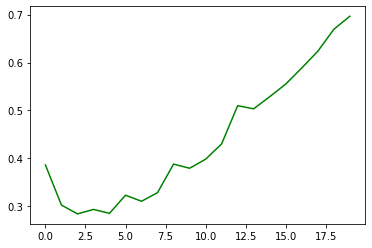

In [28]:
plt.plot(h['val_loss'],color="green",label="Validation loss")

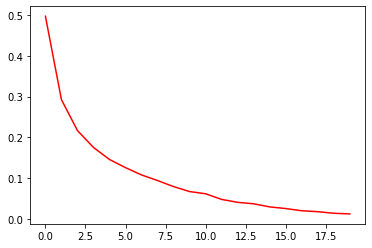

In [29]:
plt.plot(h['loss'],color="red",label="Training Loss")

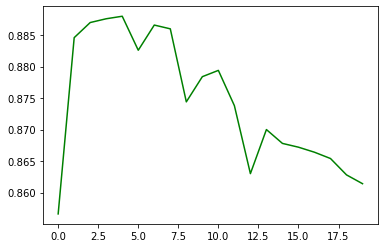

In [30]:
plt.plot(h['val_accuracy'],color="green",label="Validation loss")

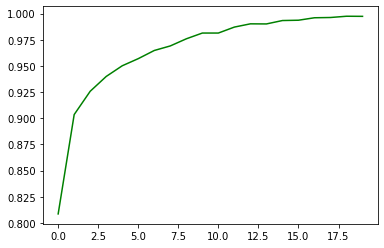

In [31]:
plt.plot(h['accuracy'],color="green",label="Validation loss")

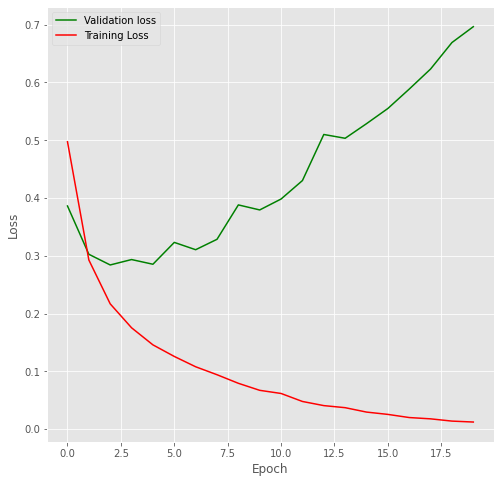

In [32]:
plt.style.use("ggplot")
plt.figure(figsize=(8,8))
plt.plot(h['val_loss'],color="green",label="Validation loss")
plt.plot(h['loss'],color="red",label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

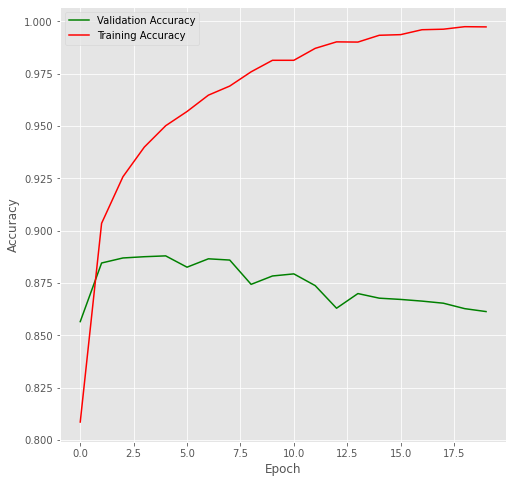

In [33]:
plt.style.use("ggplot")
plt.figure(figsize=(8,8))
plt.plot(h['val_accuracy'],color="green",label="Validation Accuracy")
plt.plot(h['accuracy'],color="red",label="Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
model.evaluate(vec_x_test,y_test)[1]

782/782 [==============================] - 1s 1ms/step - loss: 0.7821 - accuracy: 0.8479


0.8479200005531311

In [35]:
model.evaluate(vec_x_train,y_train)[1]

782/782 [==============================] - 1s 1ms/step - loss: 0.1437 - accuracy: 0.9719


0.9719200134277344

# Making Predictions

In [37]:
model.predict(vec_x_test)

array([[0.00477538],
       [1.        ],
       [0.8933755 ],
       ...,
       [0.01578847],
       [0.00746876],
       [0.6604922 ]], dtype=float32)